In [1]:
import numpy as np
import pandas as pd

In [77]:
data=pd.read_csv('Iris.csv')

In [78]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
data=data.drop('Id', axis=1)

In [80]:
from sklearn.cluster import KMeans

Let's assume 3 clusters

In [81]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [82]:
data1=data.iloc[:, [0, 1, 2]].values

In [83]:
# Applying kmeans to the dataset / Creating the kmeans classifier
pred = km.fit_predict(data1)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

We can see that there are three clusters as 0,1,2

lets add cluster column to our dataset

In [84]:
data['cluster']=pred
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


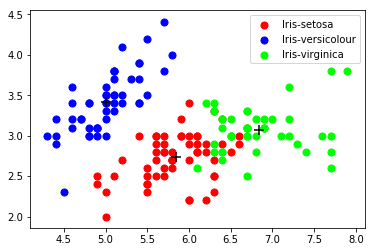

In [88]:
plt.scatter(data1[pred == 0, 0], data1[pred == 0, 1], 
            s = 50,c = 'red', label = 'Iris-setosa')
plt.scatter(data1[pred == 1, 0], data1[pred == 1, 1], 
            s = 50,c = 'blue', label = 'Iris-versicolour')
plt.scatter(data1[pred == 2, 0], data1[pred == 2, 1],
            s = 50,c = 'lime', label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'black', marker='+')

plt.legend()

In [89]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data1)
    sse.append(km.inertia_)

In [90]:
sse

[594.0446666666667,
 133.45714841470533,
 69.50013924466339,
 49.50821558441559,
 40.39566666666667,
 32.95606713737149,
 29.125797083753607,
 25.518679653679655,
 23.264915584415586]

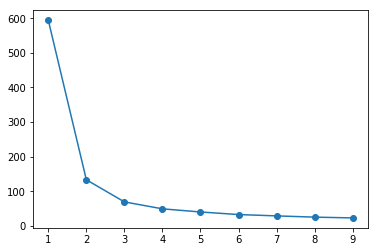

In [91]:
plt.plot(k_range, sse, marker = 'o')

That means our assumption is correct 